<a href="https://colab.research.google.com/github/AhmedMohammed13/SignLanguage/blob/main/SignLanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import pickle

In [2]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.4/602.4 kB 31.5 MB/s eta 0:00:00


In [1]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 2.1 MB/s eta 0:00:00


**Reasoning**:
Load the dataset "hand_landmarks_data.csv" into a pandas DataFrame and display the first 5 rows.



In [6]:
import pandas as pd

try:
    df = pd.read_csv('/content/sample_data/hand_landmarks_data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'hand_landmarks_data.csv' not found.")
    df = None  # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, summary statistics, missing values, and label distribution.



In [7]:
# Data Shape and Types
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Summary Statistics
print("\nSummary Statistics:\n", df.describe())

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Data Consistency - Check for duplicated rows
print("\nNumber of duplicated rows:", df.duplicated().sum())

# Label Distribution
print("\nLabel Distribution:\n", df['label'].value_counts())



Data Shape: (25675, 64)

Data Types:
 x1       float64
y1       float64
z1       float64
x2       float64
y2       float64
          ...   
z20      float64
x21      float64
y21      float64
z21      float64
label     object
Length: 64, dtype: object

Summary Statistics:
                  x1            y1            z1            x2            y2  \
count  25675.000000  25675.000000  2.567500e+04  25675.000000  25675.000000   
mean     201.958632    260.158527  1.272461e-07    202.517395    252.115322   
std       90.500333     76.533210  2.737932e-07     84.770933     75.384691   
min      -36.050926     45.722923 -2.029986e-06      7.184681     51.256840   
25%      124.110329    205.815950 -5.243216e-08    130.535929    197.999625   
50%      199.667847    255.181793  1.497277e-07    199.979530    247.113892   
75%      266.428482    304.991663  2.989988e-07    261.147457    296.850769   
max      633.556020    781.674469  1.876254e-06    606.232386    751.869416   

               

In [8]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


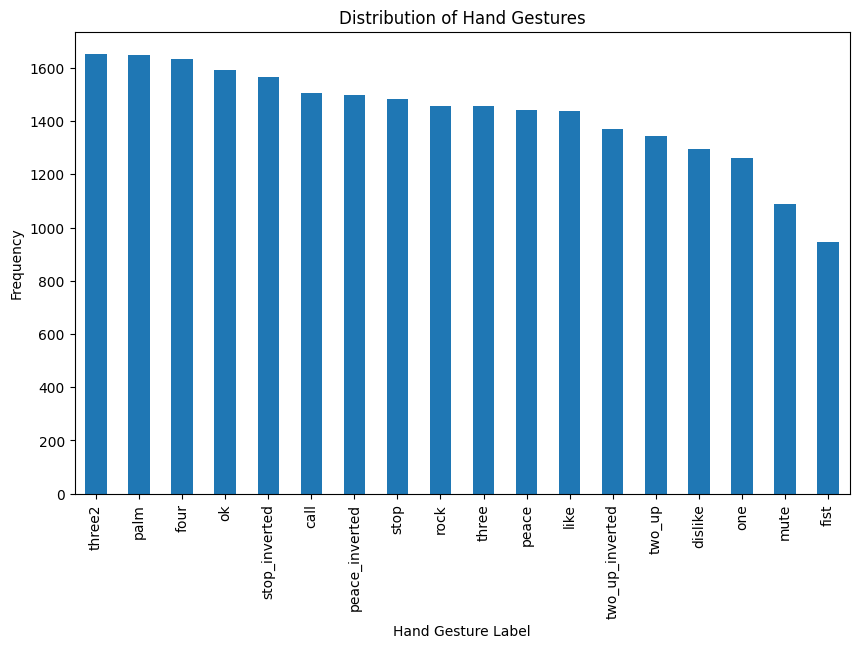

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Hand Gestures')
plt.xlabel('Hand Gesture Label')
plt.ylabel('Frequency')
plt.show()

## Data visualization

### Subtask:
Visualize the distribution of numerical features and explore potential correlations between them.


**Reasoning**:
Create histograms for numerical features and scatter plots for pairs of features to visualize distributions and correlations.



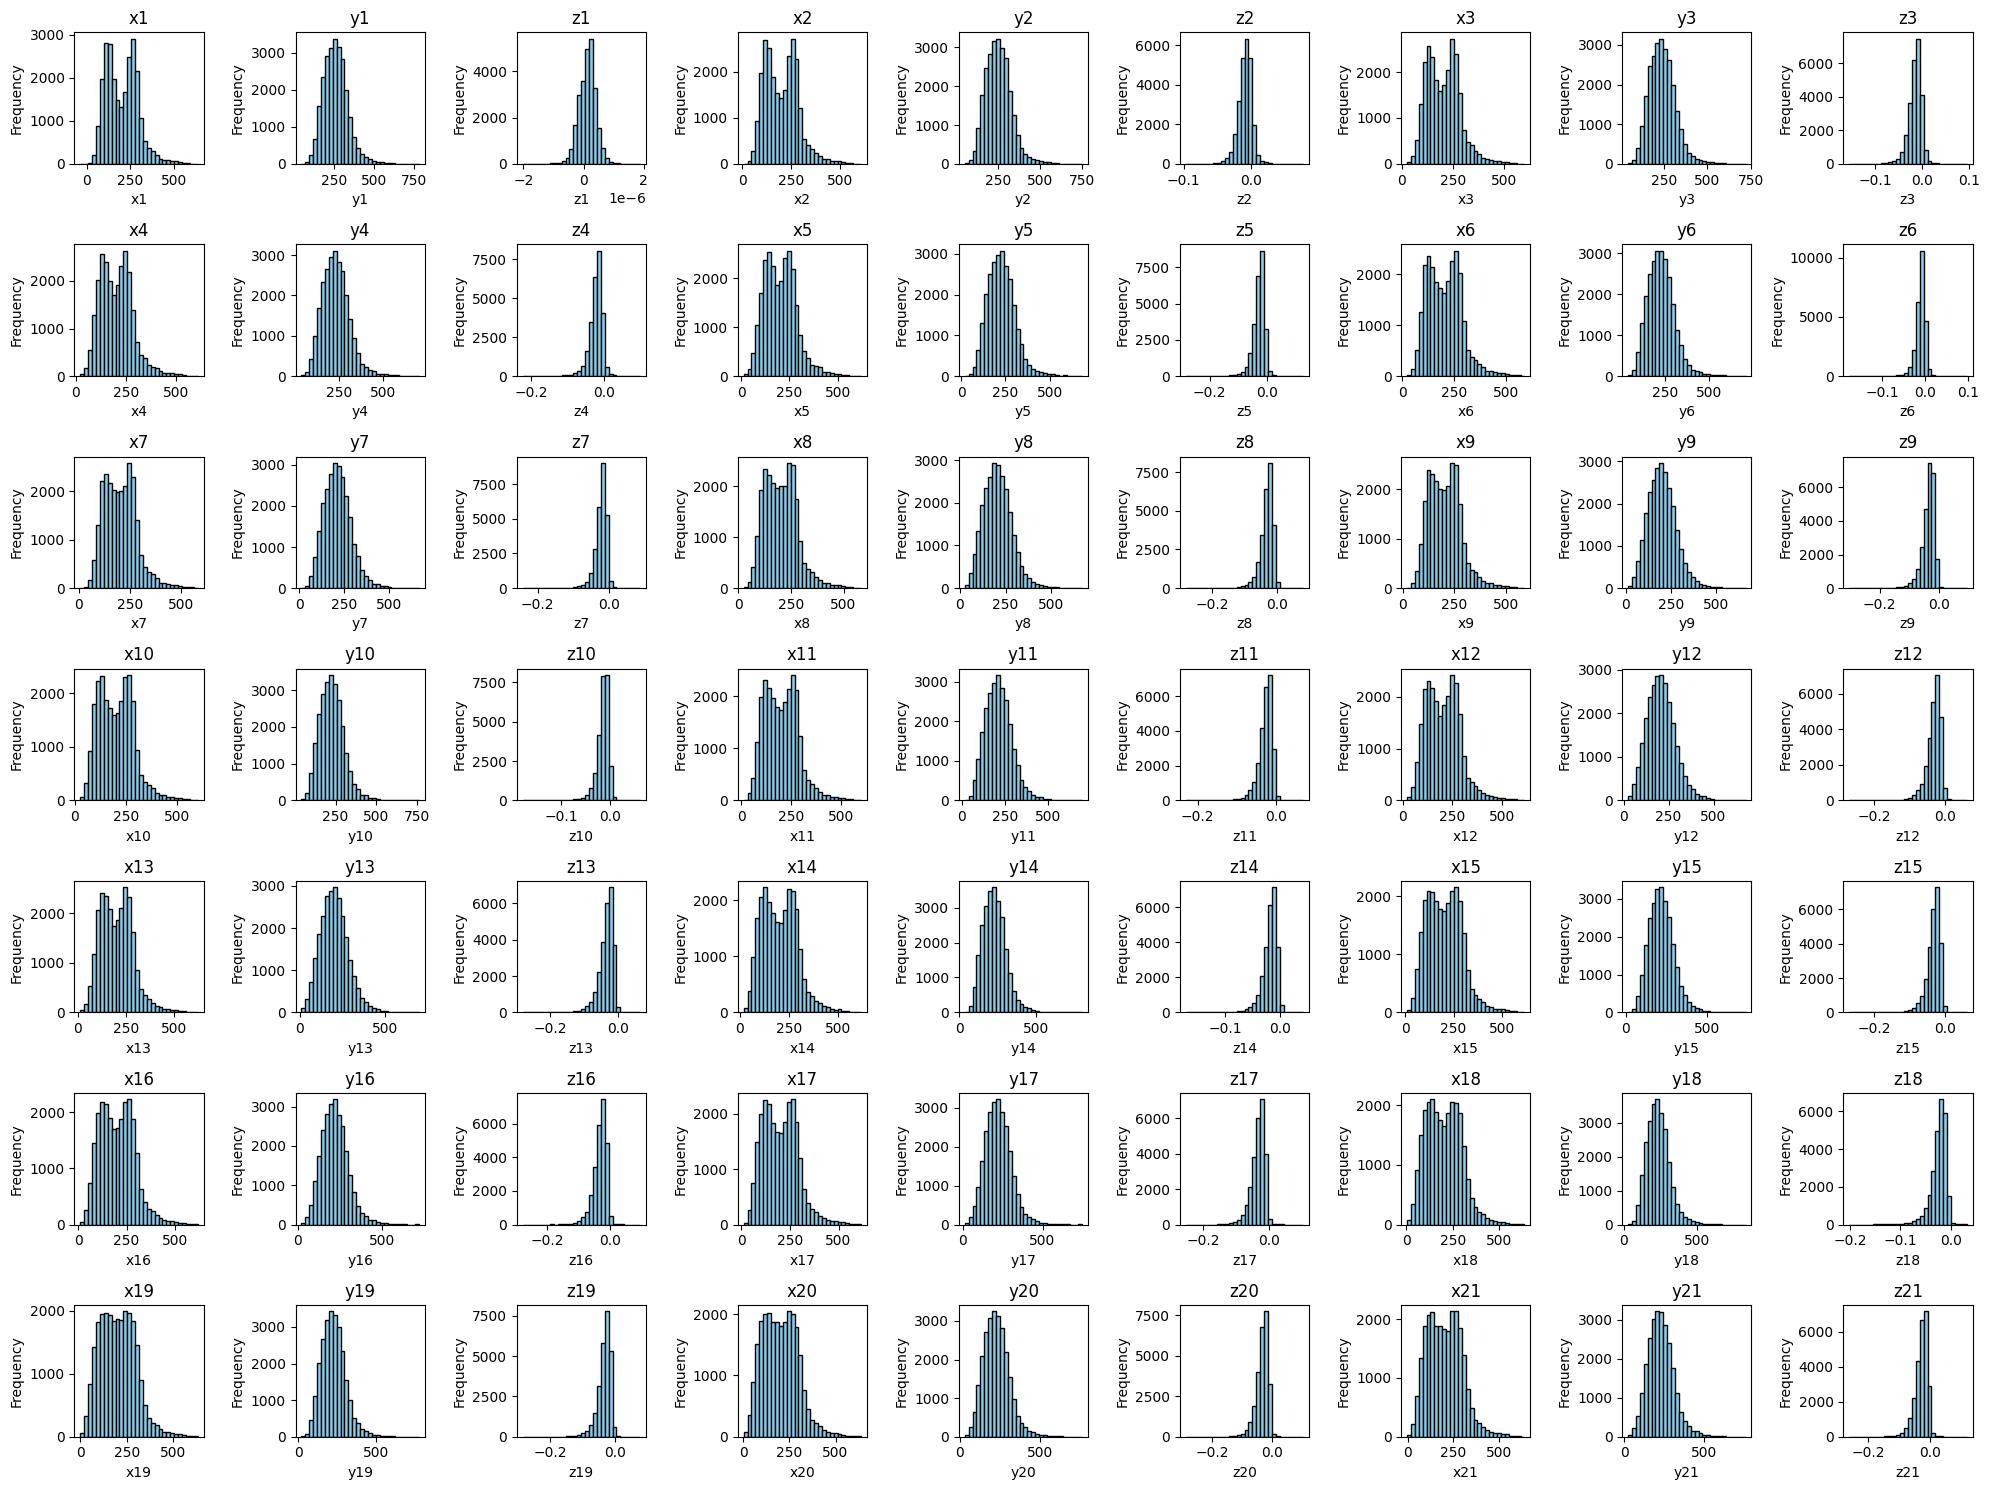

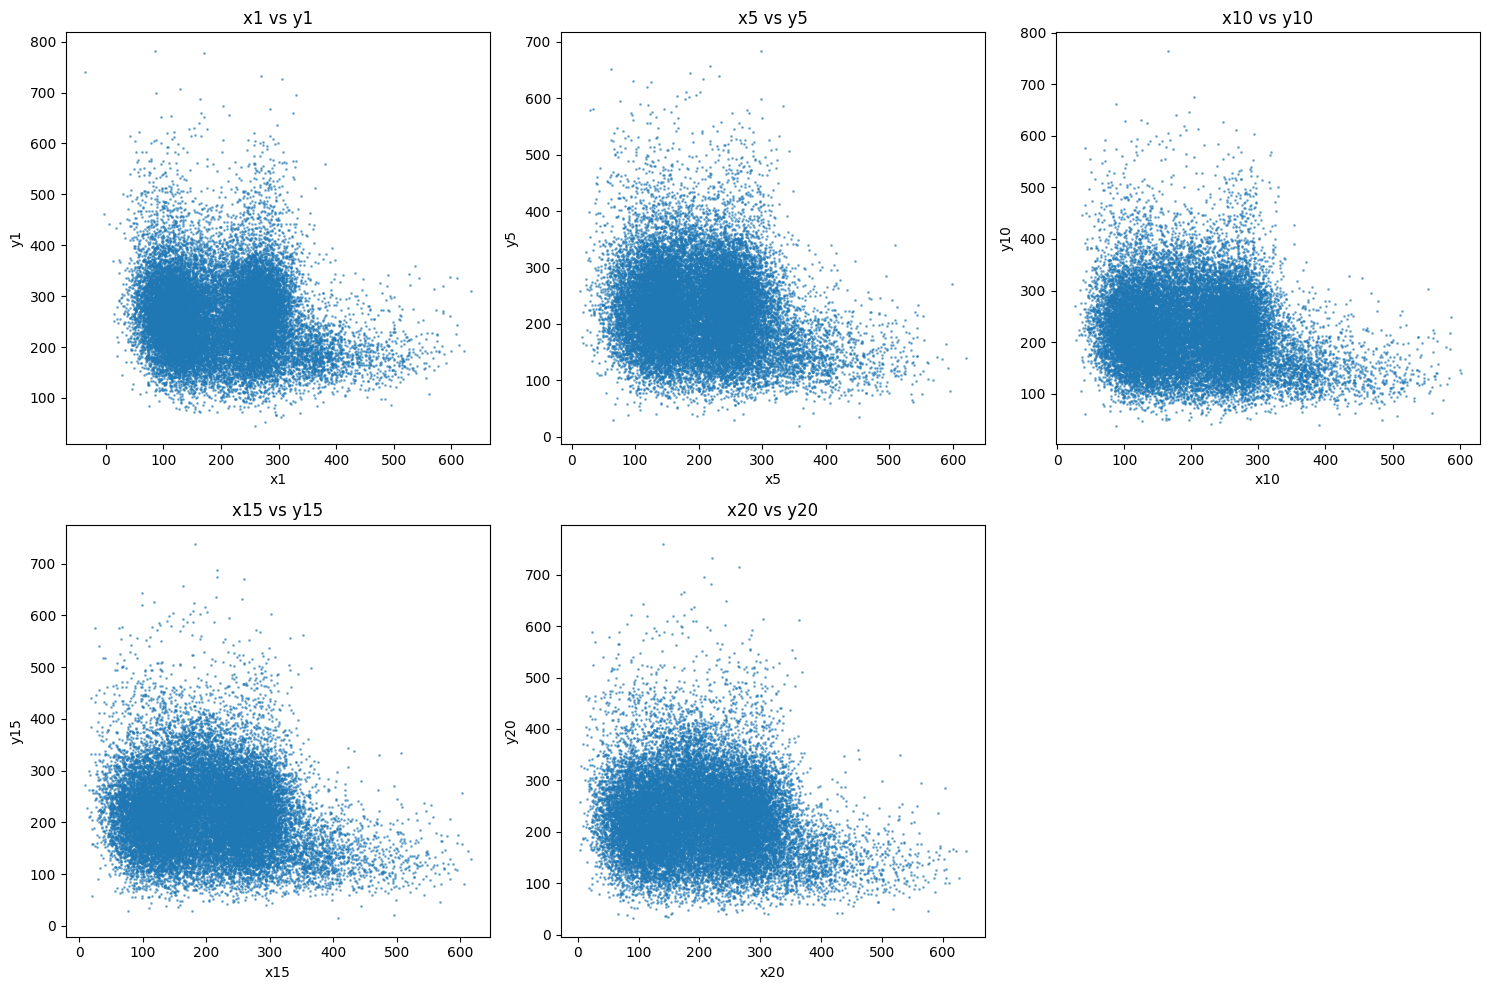

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[:-1]):  # Exclude the 'label' column
    plt.subplot(7, 9, i + 1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()


# Scatter Plots (example pairs)
plt.figure(figsize=(15, 10))
for i, (col1, col2) in enumerate([('x1', 'y1'), ('x5', 'y5'), ('x10', 'y10'), ('x15','y15'), ('x20','y20')]):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[col1], df[col2], s=1, alpha=0.5)  # Reduced marker size for better visualization
    plt.title(f'{col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()

# Pairplot (optional, may be slow for large datasets)
# sns.pairplot(df[['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3','y3','z3']], hue='label', diag_kind='kde', plot_kws={'alpha': 0.2})
# plt.savefig('pairplot.png')
# plt.show()

## Data analysis

### Subtask:
Analyze the dataset to gain insights into the hand landmark data.


**Reasoning**:
Calculate descriptive statistics, identify outliers using box plots, analyze correlations, and explore relationships between hand landmark coordinates and labels.



                 x1            y1            z1            x2            y2  \
count  25675.000000  25675.000000  2.567500e+04  25675.000000  25675.000000   
mean     201.958632    260.158527  1.272461e-07    202.517395    252.115322   
std       90.500333     76.533210  2.737932e-07     84.770933     75.384691   
min      -36.050926     45.722923 -2.029986e-06      7.184681     51.256840   
25%      124.110329    205.815950 -5.243216e-08    130.535929    197.999625   
50%      199.667847    255.181793  1.497277e-07    199.979530    247.113892   
75%      266.428482    304.991663  2.989988e-07    261.147457    296.850769   
max      633.556020    781.674469  1.876254e-06    606.232386    751.869416   

                 z2            x3            y3            z3            x4  \
count  25675.000000  25675.000000  25675.000000  25675.000000  25675.000000   
mean      -0.009465    202.862981    240.645966     -0.015946    203.025267   
std        0.010376     80.412089     74.721921    

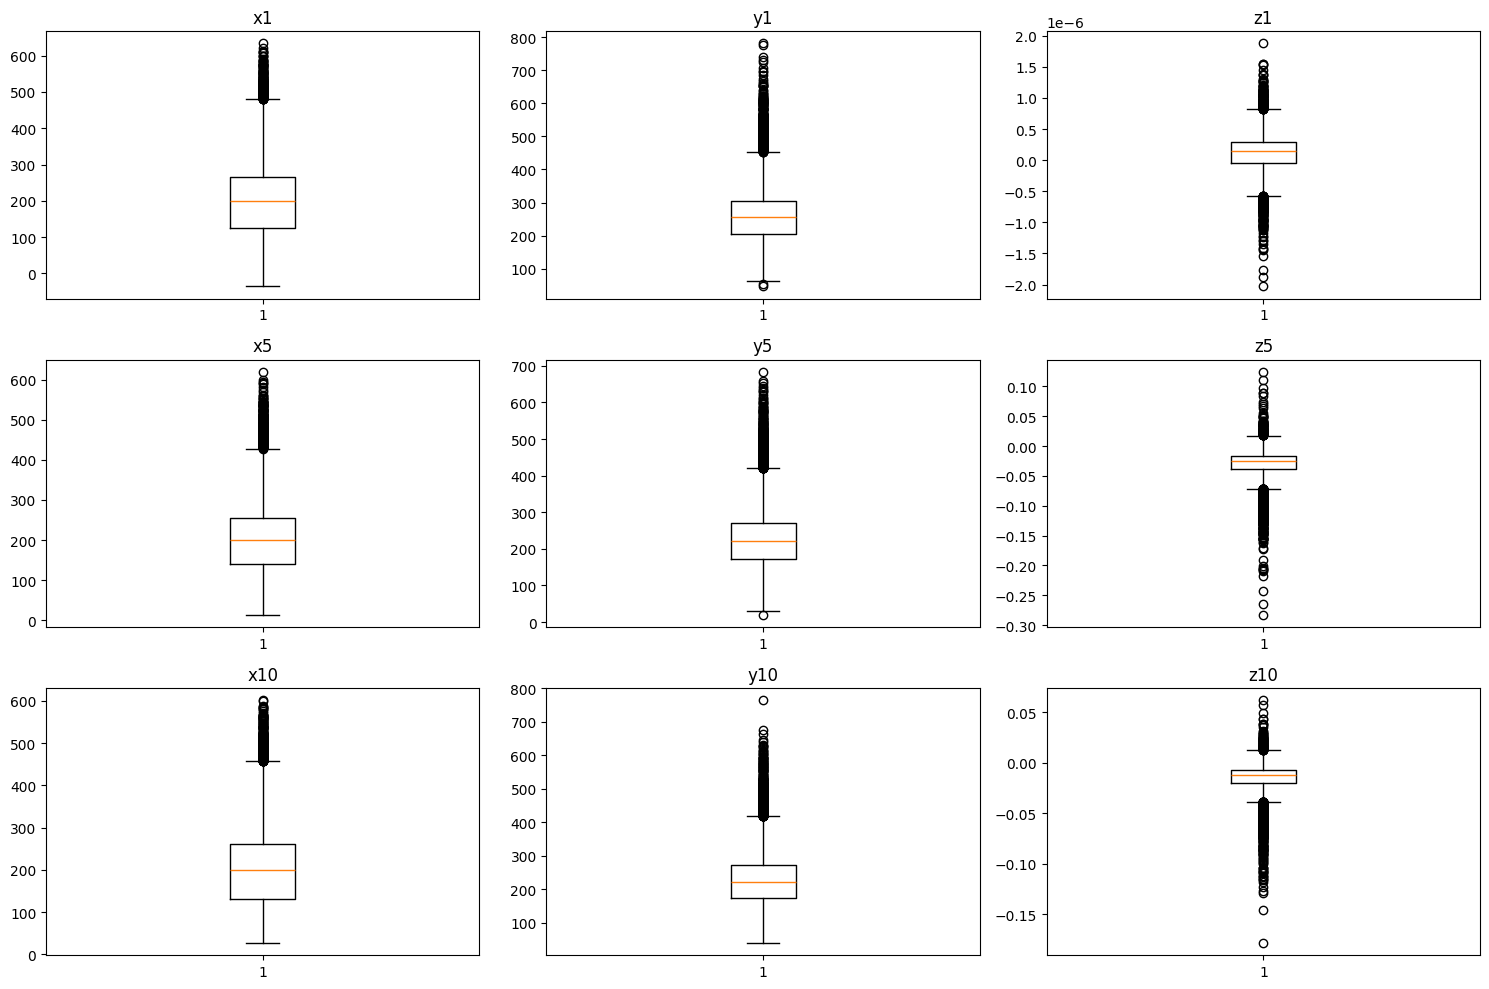

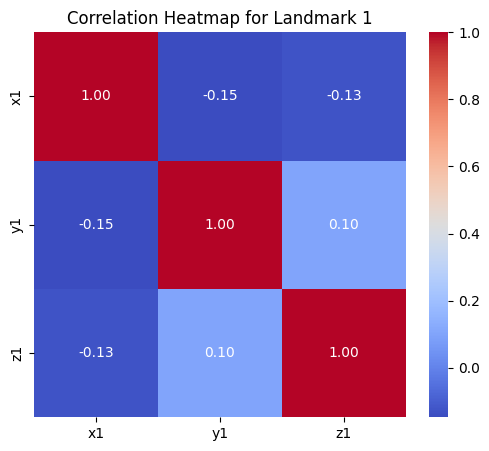

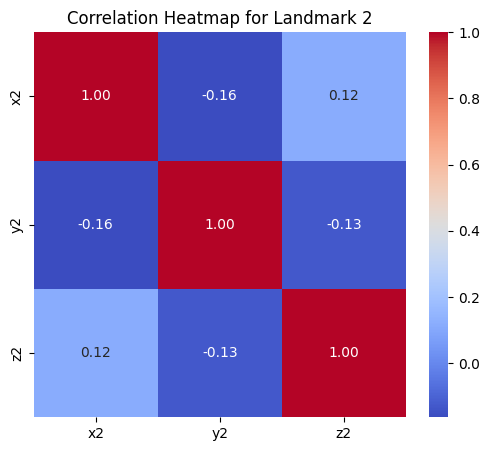

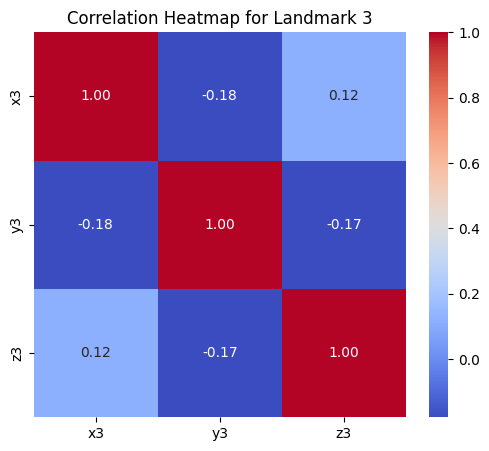

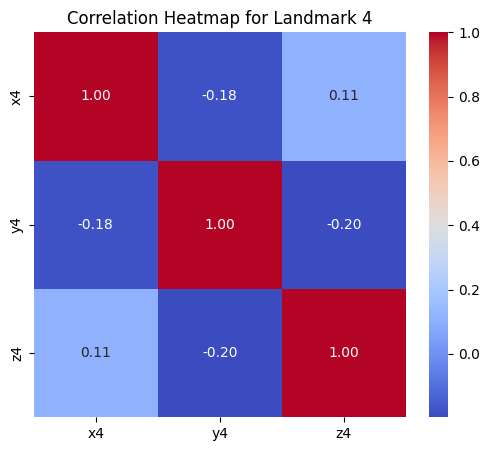

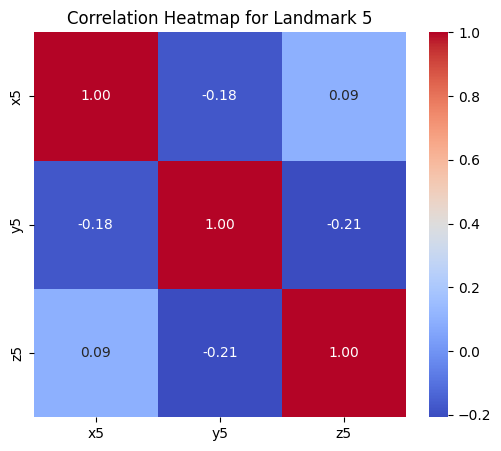

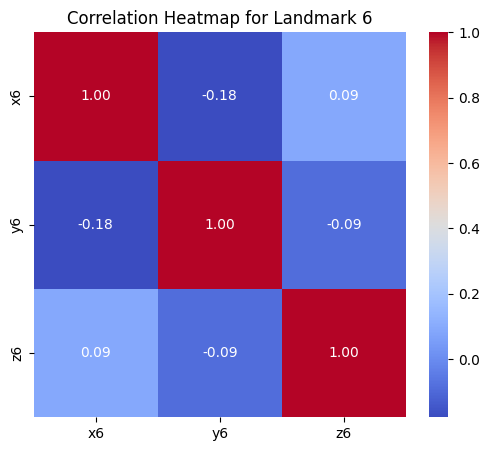

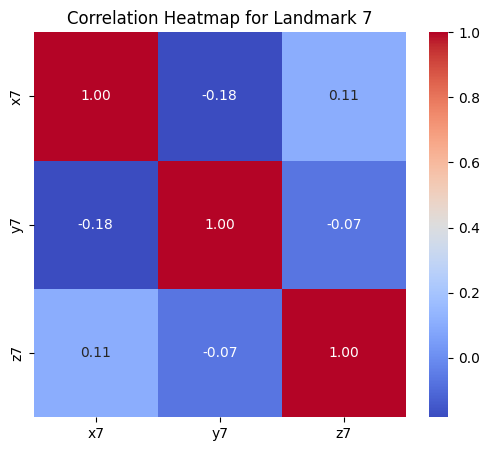

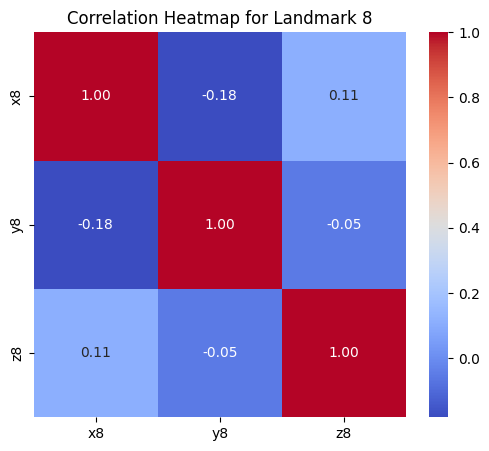

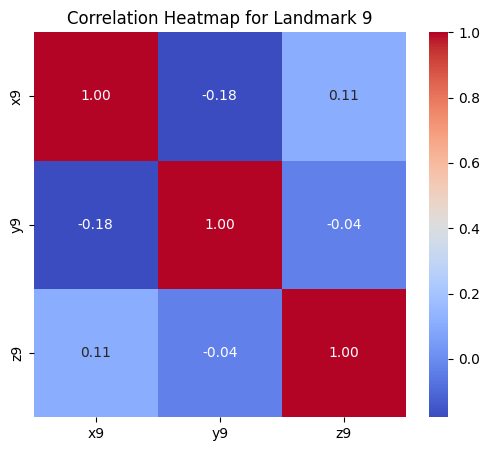

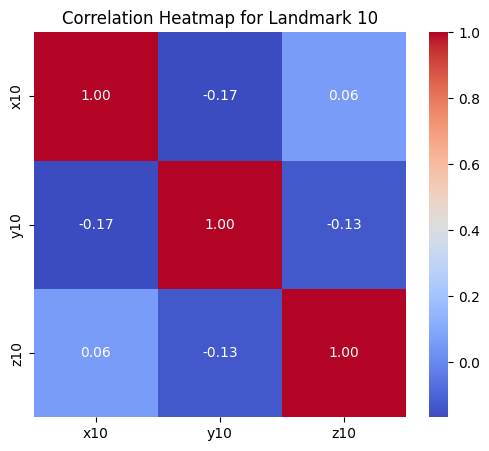

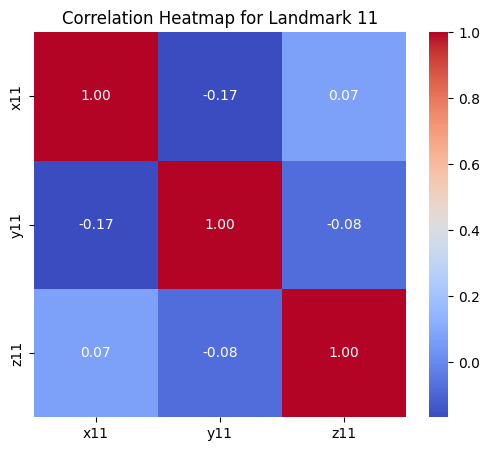

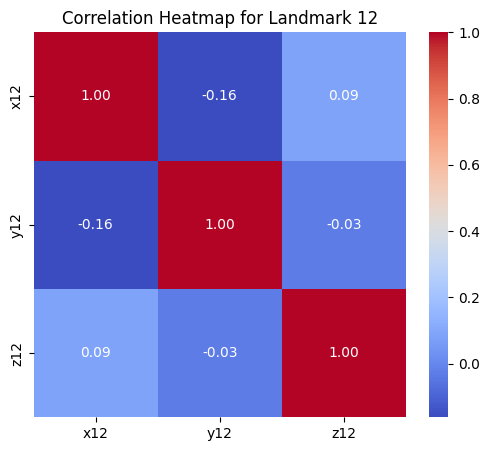

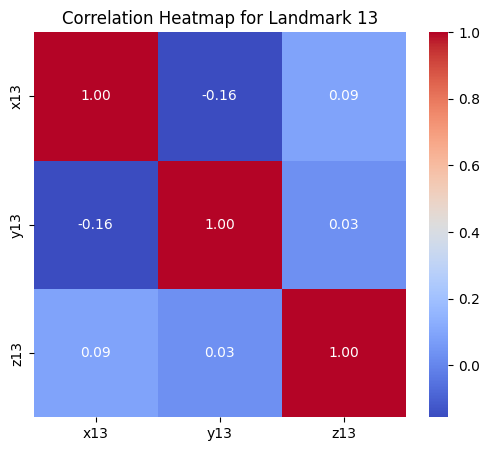

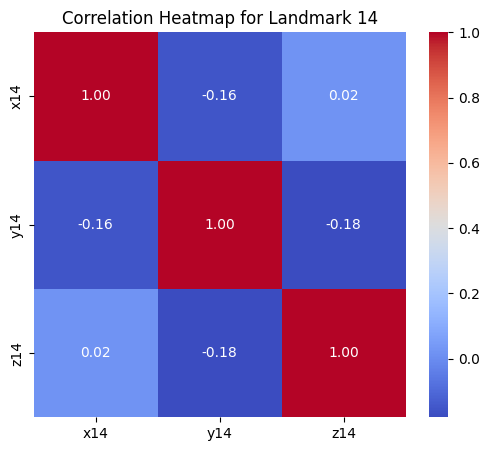

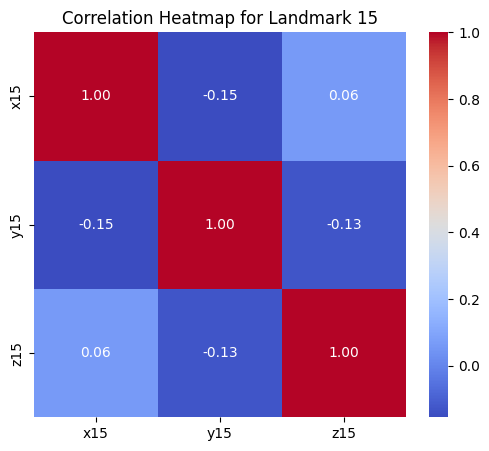

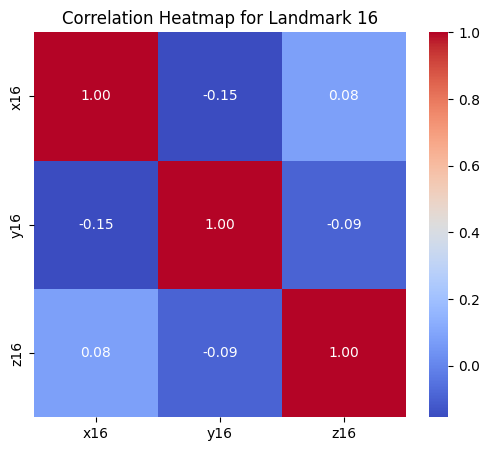

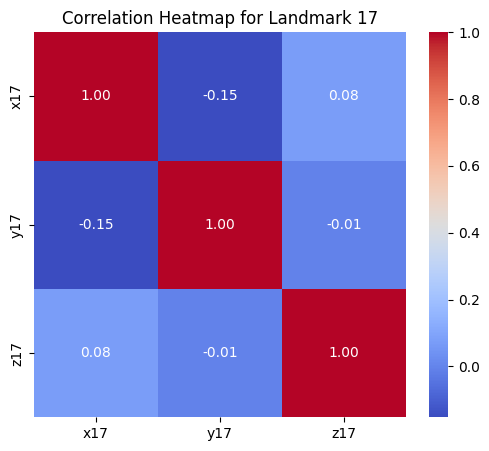

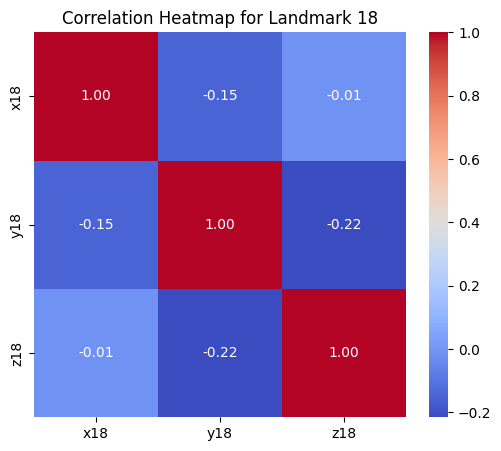

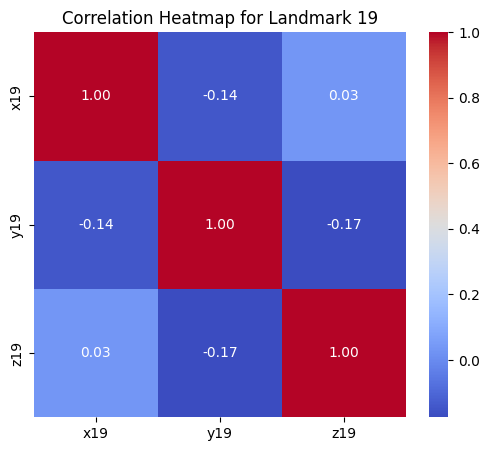

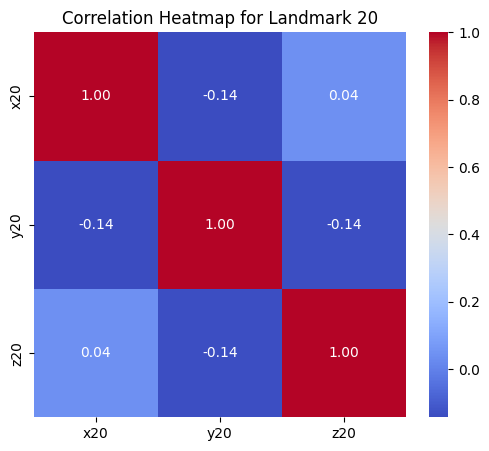

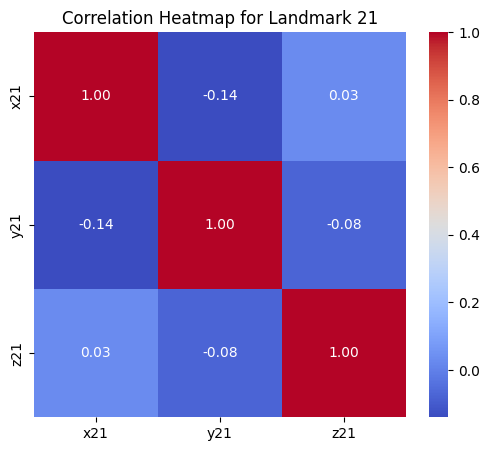

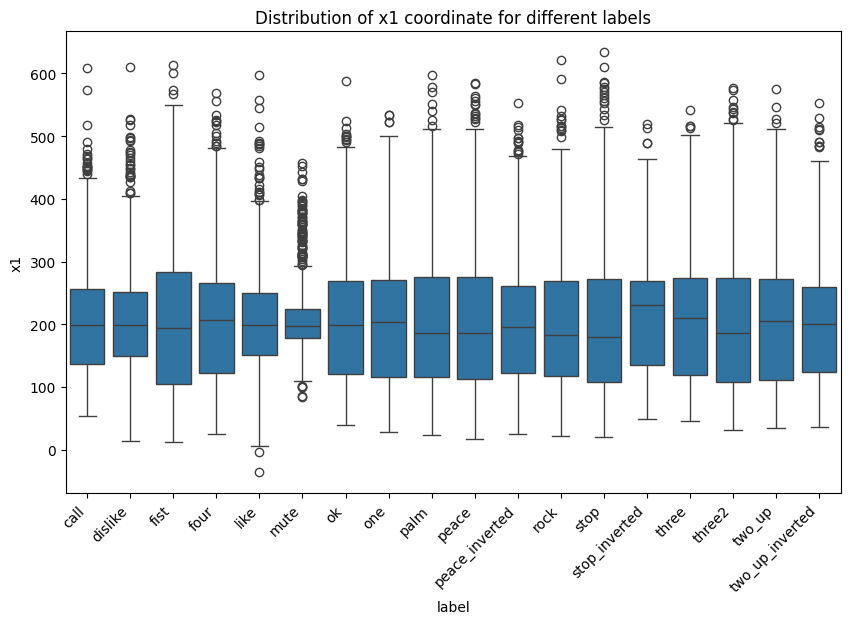

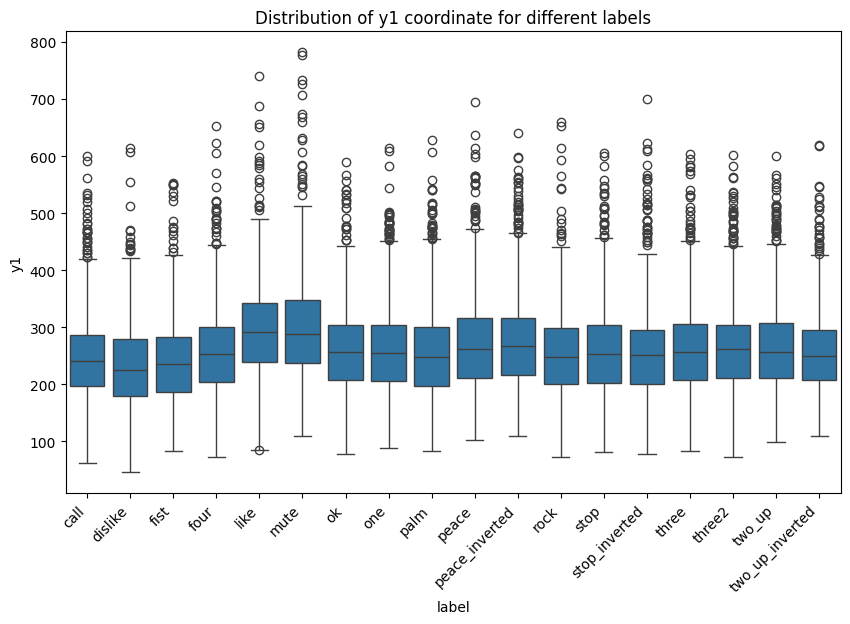

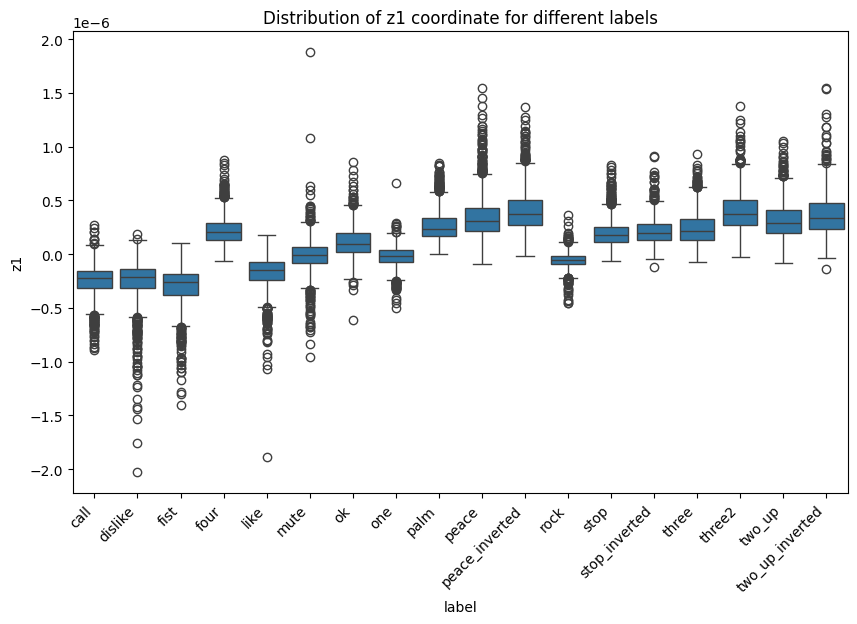

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())

# Box plots for outlier detection (example landmarks)
plt.figure(figsize=(15, 10))
for i, col in enumerate(['x1', 'y1', 'z1', 'x5', 'y5', 'z5', 'x10', 'y10', 'z10']):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation matrix and heatmap (for x, y, z of the same landmark)
landmarks = [i for i in range(1, 22)]
correlation_data = []
for landmark in landmarks:
    correlation_data.append(df[[f'x{landmark}', f'y{landmark}', f'z{landmark}']].corr())
for i, data in enumerate(correlation_data):
    plt.figure(figsize=(6, 5))
    sns.heatmap(data, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Heatmap for Landmark {i+1}")
    plt.show()

# Relationship between coordinates and labels (example landmark)
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='x1', data=df)
plt.title('Distribution of x1 coordinate for different labels')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='y1', data=df)
plt.title('Distribution of y1 coordinate for different labels')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='z1', data=df)
plt.title('Distribution of z1 coordinate for different labels')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
df.isna().sum()

,0
x1,0
y1,0
z1,0
x2,0
y2,0
...,...
z20,0
x21,0
y21,0
z21,0


In [13]:
# Checking if the data is balanced or not
df['label'].value_counts()

,count
label,
three2,1653
palm,1649
four,1634
ok,1592
stop_inverted,1567
call,1506
peace_inverted,1497
stop,1482
rock,1458


<ipython-input-14-41deee52714f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")


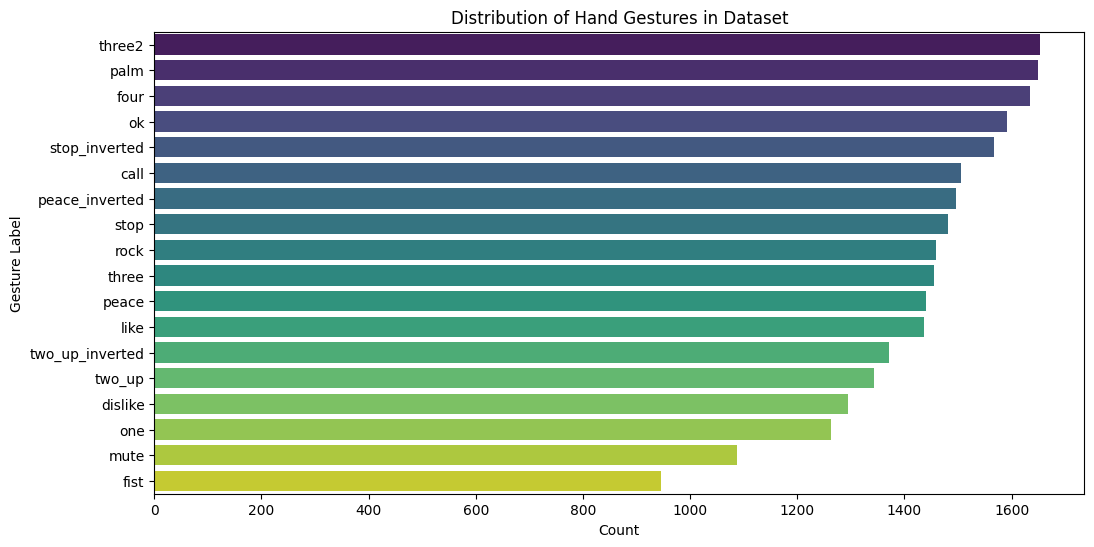

In [14]:
# Visualizing the count of each class
plt.figure(figsize=(12, 6))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Gesture Label")
plt.title("Distribution of Hand Gestures in Dataset")
plt.show()

In [15]:
# Visualizing the different classes
def plot_hand_gesture(df, sample_index):

    sample = df.iloc[sample_index]
    x_coords = [sample[f'x{i}'] for i in range(1, 22)]
    y_coords = [sample[f'y{i}'] for i in range(1, 22)]
    y_coords = np.max(y_coords) - np.array(y_coords)

    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),  # Index finger
        (5, 9), (9, 10), (10, 11), (11, 12),  # Middle finger
        (9, 13), (13, 14), (14, 15), (15, 16),  # Ring finger
        (0, 17), (13, 17), (17, 18), (18, 19), (19, 20)  # Pinky finger
    ]

    plt.figure(figsize=(5, 5))
    plt.scatter(x_coords, y_coords, color='red', label="Keypoints")
    for connection in connections:
        x1, y1 = x_coords[connection[0]], y_coords[connection[0]]
        x2, y2 = x_coords[connection[1]], y_coords[connection[1]]
        plt.plot([x1, x2], [y1, y2], 'b', linewidth=2)

    gesture_label = sample['label']

    # Display plot
    plt.title(f"Hand Gesture: {gesture_label}")
    plt.axis("equal")
    plt.legend()
    plt.show()

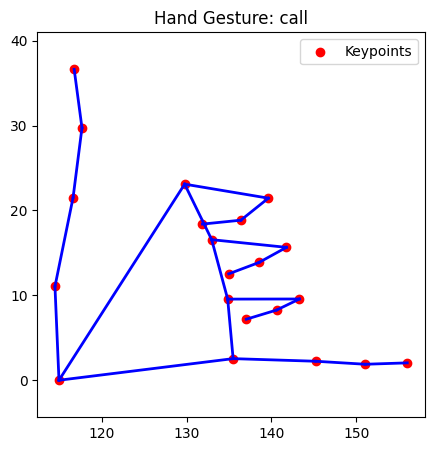

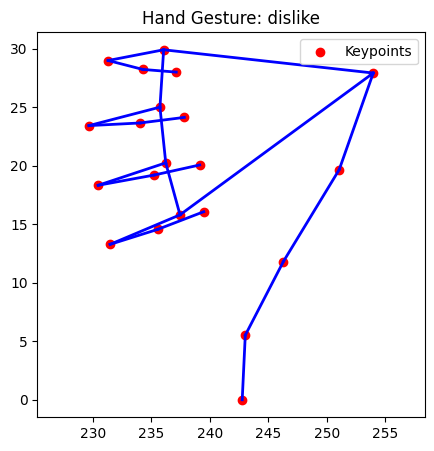

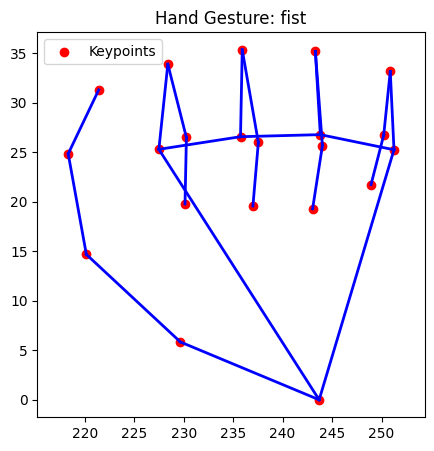

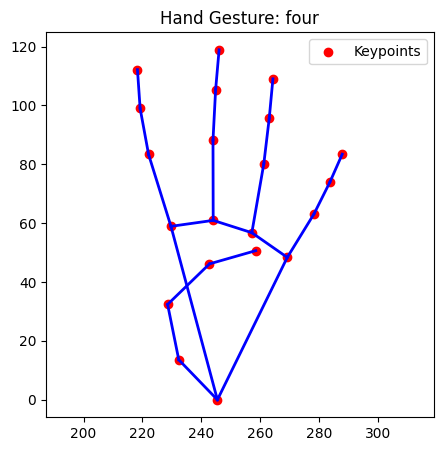

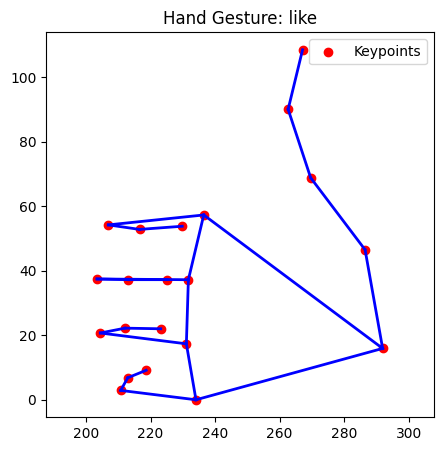

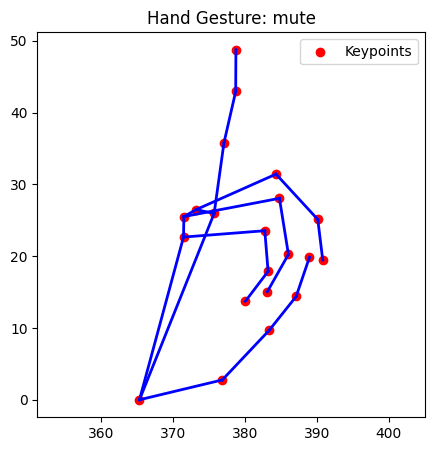

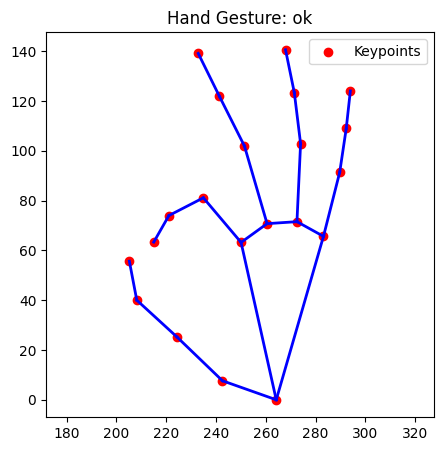

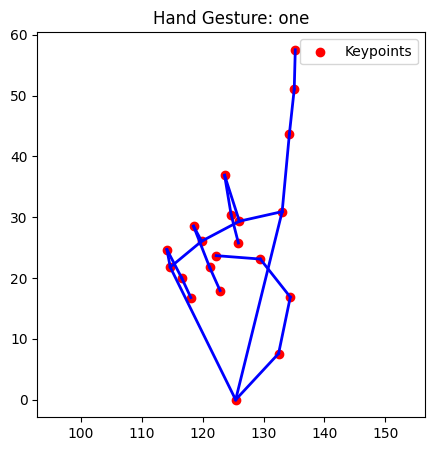

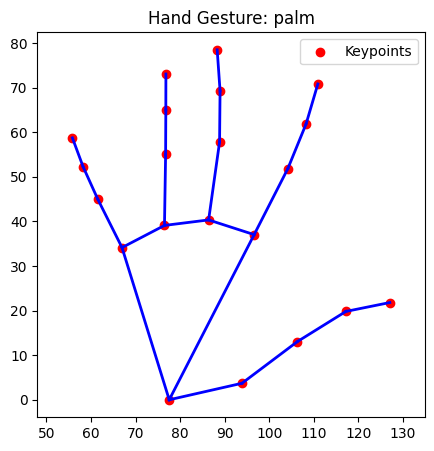

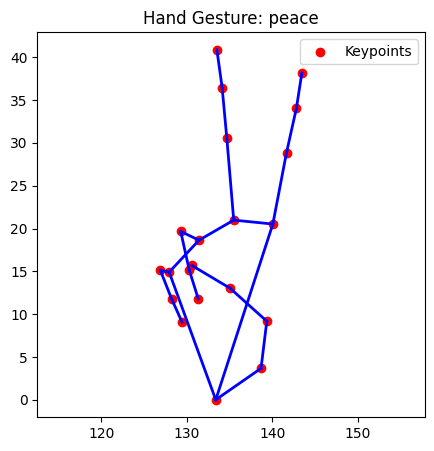

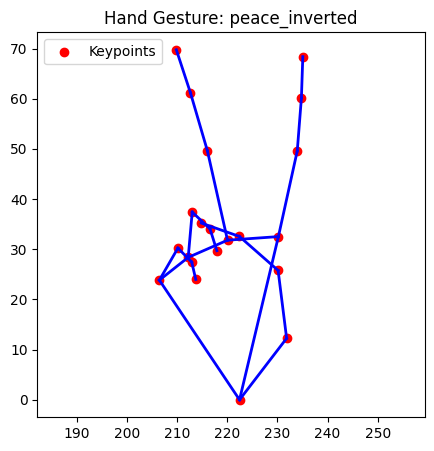

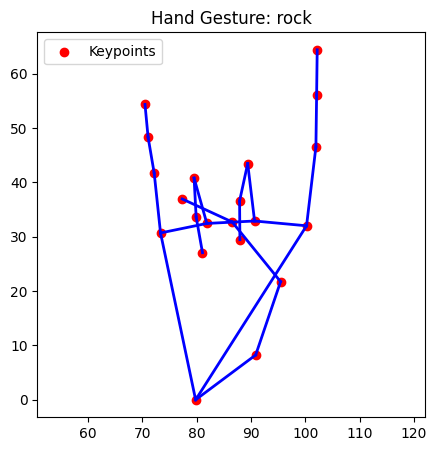

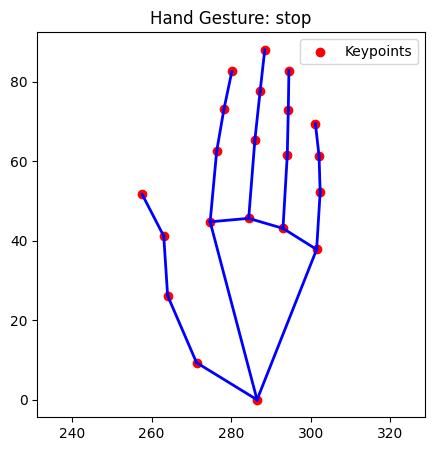

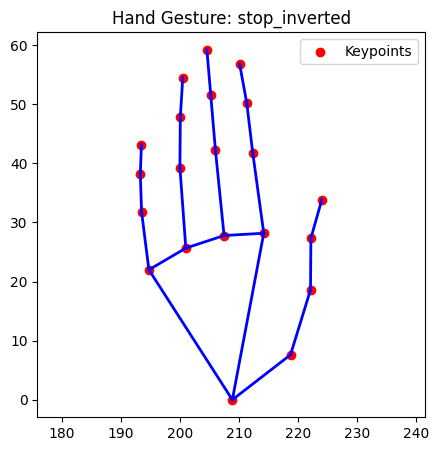

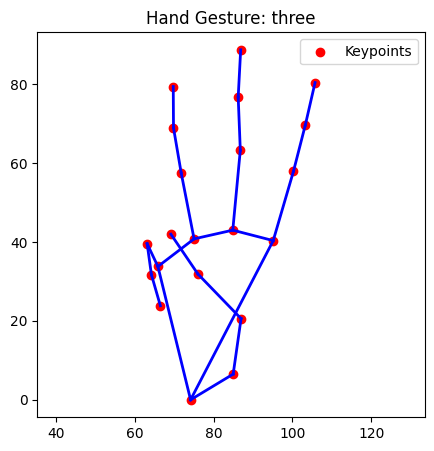

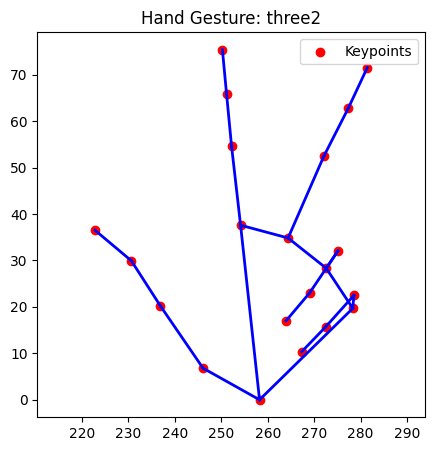

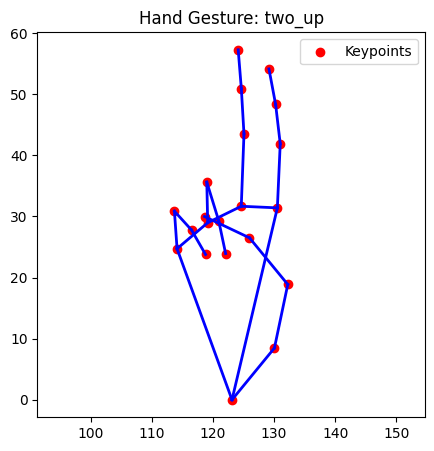

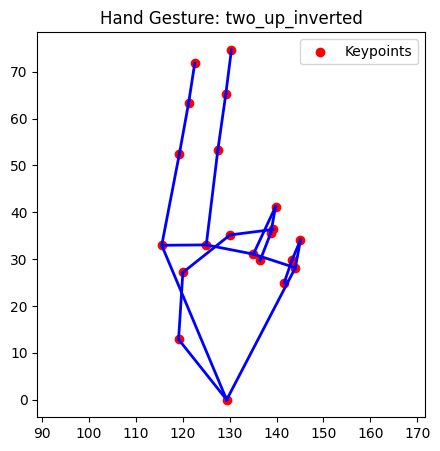

In [16]:
label_call_df = df[df['label'] == 'call']
plot_hand_gesture(label_call_df, 3)
label_dislike_df = df[df['label'] == 'dislike']
plot_hand_gesture(label_dislike_df, 15)
label_fist_df = df[df['label'] == 'fist']
plot_hand_gesture(label_fist_df, 34)
label_four_df = df[df['label'] == 'four']
plot_hand_gesture(label_four_df, 14)
label_like_df = df[df['label'] == 'like']
plot_hand_gesture(label_like_df, 2)
label_mute_df = df[df['label'] == 'mute']
plot_hand_gesture(label_mute_df, 1)
label_ok_df = df[df['label'] == 'ok']
plot_hand_gesture(label_ok_df, 34)
label_one_df = df[df['label'] == 'one']
plot_hand_gesture(label_one_df, 6)
label_palm_df = df[df['label'] == 'palm']
plot_hand_gesture(label_palm_df, 20)
label_peace_df = df[df['label'] == 'peace']
plot_hand_gesture(label_peace_df, 7)
label_peace_inverted_df = df[df['label'] == 'peace_inverted']
plot_hand_gesture(label_peace_inverted_df, 61)
label_rock_df = df[df['label'] == 'rock']
plot_hand_gesture(label_rock_df, 3)
label_stop_df = df[df['label'] == 'stop']
plot_hand_gesture(label_stop_df, 4)
label_stop_inverted_df = df[df['label'] == 'stop_inverted']
plot_hand_gesture(label_stop_inverted_df, 10)
label_three_df = df[df['label'] == 'three']
plot_hand_gesture(label_three_df, 10)
label_three2_df = df[df['label'] == 'three2']
plot_hand_gesture(label_three2_df, 10)
label_two_up_df = df[df['label'] == 'two_up']
plot_hand_gesture(label_two_up_df, 10)
label_two_up_inverted_df = df[df['label'] == 'two_up_inverted']
plot_hand_gesture(label_two_up_inverted_df, 45)

**Data Preprocessing**

In [17]:
# checking the total nulls in the data
print(df.isnull().sum().sum())

0


In [18]:
# Checking if there are duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


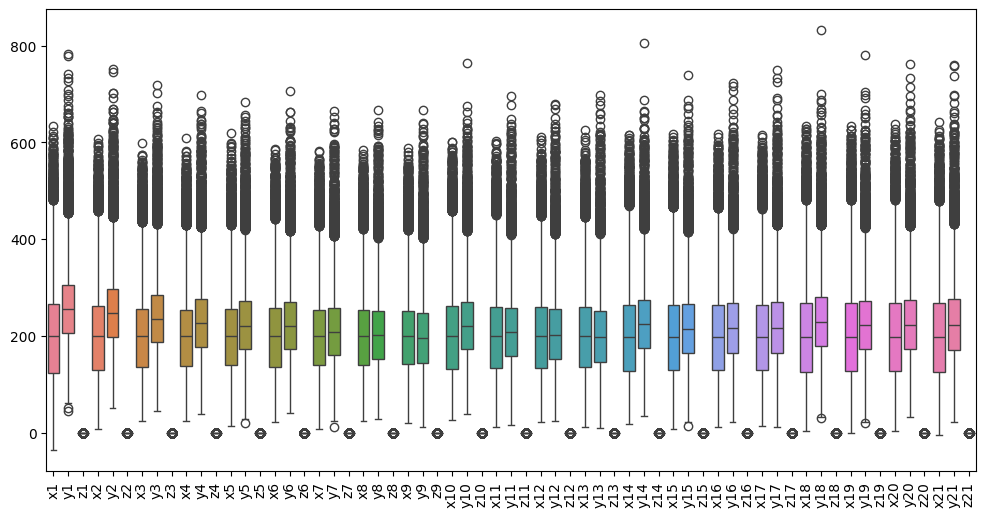

In [19]:
# Check the Distribution of Data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=90)
plt.show()

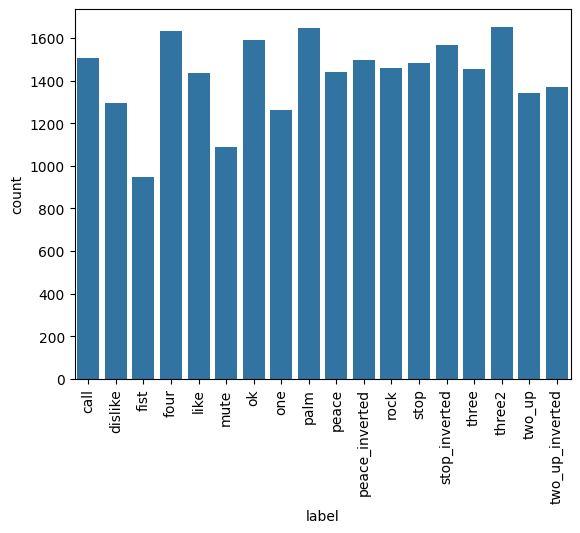

In [20]:
# Checking if the data is balanced or not
sns.countplot(x=df['label'])
plt.xticks(rotation=90)
plt.show()

In [21]:
# Normalizing Hand Landmarks
def preprocess_hand_landmarks(df):
    """
    Recenter and normalize hand landmarks.

    - Recenter: Make wrist (landmark 0) the origin.
    - Normalize: Divide all landmarks by the middle finger tip (landmark 12).
    - Keep z values unchanged.

    Parameters:
        df (pd.DataFrame): DataFrame with columns ['x1', 'y1', 'z1', ..., 'x21', 'y21', 'z21']

    Returns:
        pd.DataFrame: Preprocessed hand landmark data.
    """
    wrist_x, wrist_y = df["x1"], df["y1"]
    mid_x, mid_y = df["x13"], df["y13"]

    df_processed = df.copy()

    for i in range(1,22):  # 21 landmarks (1 to 21)
        df_processed[f"x{i}"] = (df[f"x{i}"] - wrist_x) / (abs(mid_x) + abs(mid_y))
        df_processed[f"y{i}"] = (df[f"y{i}"] - wrist_y) / (abs(mid_x) + abs(mid_y))

    return df_processed

In [22]:
# Applying Normalization on the data
df_preprocessed = preprocess_hand_landmarks(df)
df_preprocessed.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.010549,-0.020478,0.004224,-0.031708,-0.031308,0.005798,-0.052794,...,-0.078983,-0.003644,-0.020450,-0.095657,0.001627,-0.024577,-0.109790,0.004627,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.003218,-0.039459,-0.011102,0.015174,-0.077859,-0.021096,0.027717,...,0.110731,-0.009618,-0.038175,0.134010,-0.007284,-0.037336,0.155791,-0.006863,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.015856,-0.038550,-0.000184,0.040141,-0.075252,-0.009687,0.056924,...,0.128732,0.017222,-0.044068,0.153686,0.022725,-0.040469,0.175431,0.024775,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.001042,-0.024325,-0.002824,0.003656,-0.047383,-0.008911,0.005965,...,0.066556,-0.004926,-0.027622,0.079458,-0.004145,-0.027863,0.090332,-0.004505,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.000814,-0.040861,-0.002884,0.009452,-0.091081,-0.008115,0.011141,...,0.112382,-0.028064,-0.025113,0.136505,-0.032746,-0.024087,0.156538,-0.039290,-0.023486,call


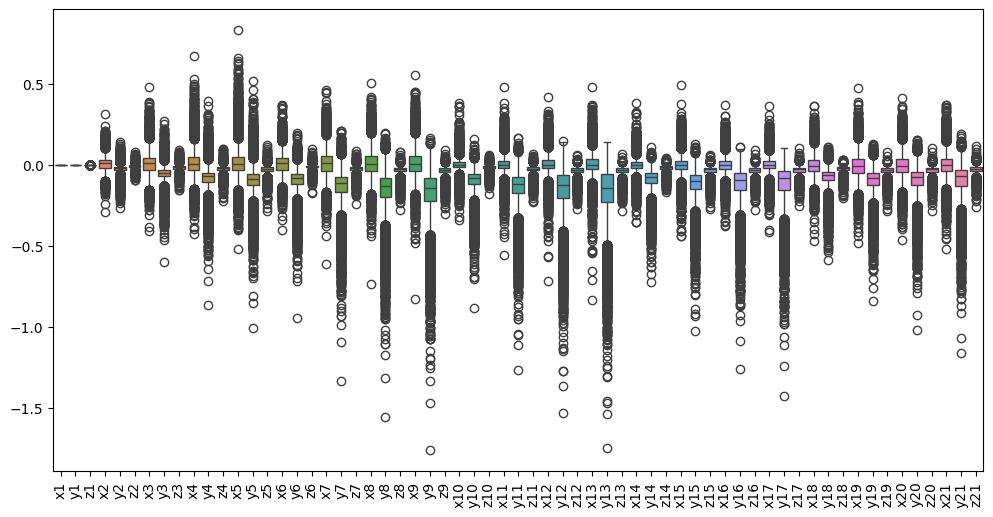

In [23]:
# Visualizing to make sure data is normalized correctly
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_preprocessed.iloc[:, :-1])
plt.xticks(rotation=90)
plt.show()

**Normalization**:

*  SVM -> Standardization
*  XGBoost -> Standaradization
*   Random Forest -> No Normalization



In [24]:
# Splitting Data to features and labels
X = df_preprocessed.drop(columns=['label'])  # Features
y = df_preprocessed['label']  # Labels

In [25]:
# categorical labels -> numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [26]:
y

array([ 0,  0,  0, ..., 17, 17, 17])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
scaler = StandardScaler()

# Random Forest (no normalization)
X_train_rf, X_test_rf = X_train.copy(), X_test.copy()

# XGBoost (standardization applied)
X_train_xgb, X_test_xgb = scaler.fit_transform(X_train), scaler.transform(X_test)

# SVM (standardization applied)
X_train_svm, X_test_svm = scaler.fit_transform(X_train), scaler.transform(X_test)

In [29]:
# to be used for the video
import joblib

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

# **Model Training and Evaluation**

In [30]:
# Random Forest (1st trial)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train)
y_pred_rf = rf_model.predict(X_test_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='weighted')
rec_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest - Accuracy: {acc_rf:.4f}, Precision: {prec_rf:.4f}, Recall: {rec_rf:.4f}, F1-score: {f1_rf:.4f}")

Random Forest - Accuracy: 0.9535, Precision: 0.9538, Recall: 0.9535, F1-score: 0.9535


In [31]:
# XGBoost (1st trial)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_xgb, y_train)
y_pred_xgb = xgb_model.predict(X_test_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
rec_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
print(f"XGBoost - Accuracy: {acc_xgb:.4f}, Precision: {prec_xgb:.4f}, Recall: {rec_xgb:.4f}, F1-score: {f1_xgb:.4f}")

XGBoost - Accuracy: 0.9661, Precision: 0.9665, Recall: 0.9661, F1-score: 0.9662


In [32]:
# SVM (1st trial)
svm_model = SVC(kernel="rbf", C=1, gamma="scale")
svm_model.fit(X_train_svm, y_train)
y_pred_svm = svm_model.predict(X_test_svm)
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, average='weighted')
rec_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"SVM - Accuracy: {acc_svm:.4f}, Precision: {prec_svm:.4f}, Recall: {rec_svm:.4f}, F1-score: {f1_svm:.4f}")

SVM - Accuracy: 0.9562, Precision: 0.9576, Recall: 0.9562, F1-score: 0.9564


# **Hyperparameters Tuning**

In [33]:
# Trying Random Search for Hyperparameters Tuning to Choose best Hyperparameters
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
halving_search = HalvingRandomSearchCV(
    RandomForestClassifier(random_state=42),
    param_dist,
    factor=2,
    min_resources='smallest',
    cv=3,
    n_jobs=-1,
    verbose=1
)
halving_search.fit(X_train_rf, y_train)

for i in range(len(halving_search.cv_results_["mean_test_score"])):
    print(f"Trial {i + 1}: Accuracy = {halving_search.cv_results_['mean_test_score'][i]:.4f}")


best_rf = halving_search.best_estimator_

n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 108
max_resources_: 20540
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 190
n_resources: 108
Fitting 3 folds for each of 190 candidates, totalling 570 fits
----------
iter: 1
n_candidates: 95
n_resources: 216
Fitting 3 folds for each of 95 candidates, totalling 285 fits
----------
iter: 2
n_candidates: 48
n_resources: 432
Fitting 3 folds for each of 48 candidates, totalling 144 fits
----------
iter: 3
n_candidates: 24
n_resources: 864
Fitting 3 folds for each of 24 candidates, totalling 72 fits
----------
iter: 4
n_candidates: 12
n_resources: 1728
Fitting 3 folds for each of 12 candidates, totalling 36 fits
----------
iter: 5
n_candidates: 6
n_resources: 3456
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 6
n_candidates: 3
n_resources: 6912
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 7
n_candidates: 2
n_resources: 138

In [34]:
# Best Random Forest Model So Far with the Best Hyperparameters
best_rf

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [35]:
# Evaluation of Random Forest Optimized Model
best_rf.fit(X_train_rf, y_train)

y_pred = best_rf.predict(X_test_rf)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Optimized Random Forest - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")


Optimized Random Forest - Accuracy: 0.9595, Precision: 0.9601, Recall: 0.9600, F1-score: 0.9600


In [36]:
# Saving the Random Forest Model to be Used Later
with open("best_rf.pkl", "wb") as file:
    pickle.dump(best_rf, file)

# **XGBoost**

In [37]:
# Trying Optuna for Hyperparameters Tuning to Choose best Hyperparameters
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    gamma = trial.suggest_float('gamma', 0, 1)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )

    model.fit(X_train_xgb, y_train)
    y_pred = model.predict(X_test_xgb)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    trial.set_user_attr("accuracy", acc)
    trial.set_user_attr("f1_weighted", f1)

    return f1

In [38]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb, n_trials=50)
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2025-04-09 20:25:56,346] A new study created in memory with name: no-name-7eb553a1-877f-46e8-b135-959a864aea46
[I 2025-04-09 20:26:01,470] Trial 0 finished with value: 0.962504988366007 and parameters: {'n_estimators': 64, 'learning_rate': 0.12422229597494301, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.9602366269279351, 'subsample': 0.9682939253272942, 'colsample_bytree': 0.9323438751755684}. Best is trial 0 with value: 0.962504988366007.
[I 2025-04-09 20:26:16,100] Trial 1 finished with value: 0.9483810515646285 and parameters: {'n_estimators': 197, 'learning_rate': 0.01643292658424329, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 0.38579268143551726, 'subsample': 0.7917840187494651, 'colsample_bytree': 0.8772000386192385}. Best is trial 0 with value: 0.962504988366007.
[I 2025-04-09 20:26:30,849] Trial 2 finished with value: 0.9688914849040463 and parameters: {'n_estimators': 242, 'learning_rate': 0.03832953902492403, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.47

Best Hyperparameters: {'n_estimators': 290, 'learning_rate': 0.13038548499932226, 'max_depth': 10, 'min_child_weight': 10, 'gamma': 0.10939069079291036, 'subsample': 0.9805366444190726, 'colsample_bytree': 0.6307751582291268}


In [39]:
# Train XGBoost model with the best parameters (from optuna Hyperparameters Tuning)
best_xgb_model = XGBClassifier(**best_params, random_state=42)
best_xgb_model.fit(X_train_xgb, y_train)
# Evaluating XGBoost Optimized Model
y_pred_best = best_xgb_model.predict(X_test_xgb)
acc_best = accuracy_score(y_test, y_pred_best)
prec_best = precision_score(y_test, y_pred_best, average='weighted')
rec_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Optimized XGBoost - Accuracy: {acc_best:.4f}, Precision: {prec_best:.4f}, Recall: {rec_best:.4f}, F1-score: {f1_best:.4f}")


Optimized XGBoost - Accuracy: 0.9735, Precision: 0.9737, Recall: 0.9735, F1-score: 0.9736


In [40]:
# Saving the XGBoost Model to be Used Later
with open("best_xgb_model.pkl", "wb") as file:
    pickle.dump(best_xgb_model, file)

### SVM

In [41]:
# Trying Optuna for Hyperparameters Tuning to Choose best Hyperparameters
def objective_svm(trial):
    C = trial.suggest_float("C", 1e-3, 1e2)
    gamma = trial.suggest_float("gamma", 1e-4, 1e1)
    kernel = trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])

    svm_model = SVC(kernel=kernel, C=C, gamma=gamma)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(svm_model, X_train_svm, y_train, cv=skf, scoring=make_scorer(f1_score, average="weighted"))

    return f1.mean()

In [42]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_svm, n_trials=50, n_jobs=-1)
best_params = study.best_params
print("Best hyperparameters:", best_params)

[I 2025-04-09 20:34:45,924] A new study created in memory with name: no-name-f5daff94-8a1f-409f-94b1-f043877200e4
[I 2025-04-09 20:41:23,315] Trial 23 finished with value: 0.9318312606899862 and parameters: {'C': 2.6919716411015093, 'gamma': 9.278770005423233, 'kernel': 'linear'}. Best is trial 23 with value: 0.9318312606899862.
[I 2025-04-09 20:43:15,115] Trial 25 finished with value: 0.9398378152960392 and parameters: {'C': 5.317112282908303, 'gamma': 5.631100527919601, 'kernel': 'linear'}. Best is trial 25 with value: 0.9398378152960392.
[I 2025-04-09 20:44:18,117] Trial 30 finished with value: 0.9593509639739839 and parameters: {'C': 69.31945209452566, 'gamma': 0.0934316245784499, 'kernel': 'poly'}. Best is trial 30 with value: 0.9593509639739839.
[I 2025-04-09 20:44:23,118] Trial 7 finished with value: 0.9585758450777201 and parameters: {'C': 4.1134259625477245, 'gamma': 3.858559711093279, 'kernel': 'poly'}. Best is trial 30 with value: 0.9593509639739839.
[I 2025-04-09 20:44:24,2

Best hyperparameters: {'C': 69.31945209452566, 'gamma': 0.0934316245784499, 'kernel': 'poly'}


In [43]:
best_params

{'C': 69.31945209452566, 'gamma': 0.0934316245784499, 'kernel': 'poly'}

In [44]:
# Using the Best Hyperparameters for SVM
optimized_svm = SVC(**best_params)
optimized_svm.fit(X_train_svm, y_train)

y_pred_optimized = optimized_svm.predict(X_test_svm)
# Evaluating the Optimized SVM Model
acc_svm = accuracy_score(y_test, y_pred_optimized)
prec_svm = precision_score(y_test, y_pred_optimized, average='weighted')
rec_svm = recall_score(y_test, y_pred_optimized, average='weighted')
f1_svm = f1_score(y_test, y_pred_optimized, average='weighted')

print(f"Optimized SVM - Accuracy: {acc_svm:.4f}, Precision: {prec_svm:.4f}, Recall: {rec_svm:.4f}, F1-score: {f1_svm:.4f}")


Optimized SVM - Accuracy: 0.9634, Precision: 0.9636, Recall: 0.9634, F1-score: 0.9634


In [45]:
# Saving the SVM Model to be Used Later
with open("optimized_svm_.pkl", "wb") as file:
    pickle.dump(optimized_svm, file)

# **Conclusion**
y_test -> for all , X_test_rf -> Random Forest , X_test_xgb -> XGBoost , X_test_svm -> SVM

In [46]:
''''
Comparing between the 3 trained model to choose the best of them
according to Accuracy, Precision, Recall and F1- Score

'''
model_names = {
    "best_rf.pkl": "Random Forest",
    "optimized_svm_.pkl": "SVM",
    "optimized_xgb.pkl": "XGBoost"
}

results = []

def load_and_evaluate_model(model_path, X_test, y_test):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_name = model_names.get(model_path, model_path)
    results.append([model_name, f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}"])


In [48]:
!pip install tabulate

In [50]:
from tabulate import tabulate

load_and_evaluate_model("best_rf.pkl", X_test_rf, y_test)
load_and_evaluate_model("optimized_svm_.pkl", X_test_svm, y_test)
load_and_evaluate_model("best_xgb_model.pkl", X_test_xgb, y_test)

# Print results as a Markdown table
headers = ["Model", "Accuracy", "Precision", "Recall", "F1-score"]
print(tabulate(results, headers=headers, tablefmt="github"))


| Model              |   Accuracy |   Precision |   Recall |   F1-score |
|--------------------|------------|-------------|----------|------------|
| Random Forest      |     0.9595 |      0.9598 |   0.9595 |     0.9595 |
| SVM                |     0.9634 |      0.9636 |   0.9634 |     0.9634 |
| Random Forest      |     0.9595 |      0.9598 |   0.9595 |     0.9595 |
| SVM                |     0.9634 |      0.9636 |   0.9634 |     0.9634 |
| best_xgb_model.pkl |     0.9735 |      0.9737 |   0.9735 |     0.9736 |


# **Start with camera**

In [51]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.8 MB/s eta 0:00:00


In [54]:
!pip install opencv-python
!pip install mediapipe

In [66]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib
from pyngrok import ngrok

In [65]:
!pip install pyngrok

In [71]:
'''
# Load the trained model, scaler, and label encoder
model = joblib.load("best_xgb_model.pkl")  # Replace with your model path
scaler = joblib.load("scaler.pkl")  # Replace with your scaler path
label_encoder = joblib.load("label_encoder.pkl")  # Replace with your label encoder path

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Setup ngrok tunnel
port = 8554  # Choose an available port
public_url = ngrok.connect(port).public_url
print(f" * Tunnel started at: {public_url}")

# Use the public URL as the video source
video_path = public_url
cap = cv2.VideoCapture(video_path)

# Get video properties (for output video)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))
out = cv2.VideoWriter("output_video.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

def preprocess_hand_landmarks(landmarks):
    """
    Process hand landmarks for model inference.

    Parameters:
        landmarks (list): List of 21 landmark points (x, y, z).

    Returns:
        np.array: Scaled feature array.
    """
    df = pd.DataFrame([landmarks], columns=[f"{axis}{i}" for i in range(1, 22) for axis in ['x', 'y', 'z']])

    # Extract wrist (landmark 1) and middle finger tip (landmark 13)
    wrist_x, wrist_y = df["x1"], df["y1"]
    mid_x, mid_y = df["x13"], df["y13"]

    # Normalize all landmarks
    for i in range(1, 22):
        df[f"x{i}"] = (df[f"x{i}"] - wrist_x) / (abs(mid_x) + abs(mid_y))
        df[f"y{i}"] = (df[f"y{i}"] - wrist_y) / (abs(mid_x) + abs(mid_y))

    # Scale features
    return scaler.transform(df)


gesture_names = [
    "call", "dislike", "fist", "four", "like", "mute", "ok", "one", "palm", "peace",
    "peace_inverted", "rock", "stop", "stop_inverted", "three", "three2", "two_up", "two_up_inverted"
]

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit if video ends

    # Convert frame to RGB for MediaPipe
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process hand detection
    result = hands.process(rgb_frame)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Extract landmark positions
            landmarks = []
            for i, landmark in enumerate(hand_landmarks.landmark):
                landmarks.extend([landmark.x, landmark.y, landmark.z])

            # Preprocess landmarks
            processed_features = preprocess_hand_landmarks(landmarks)

            # Make prediction
            prediction_prob = model.predict_proba(processed_features)[0]
            predicted_index = np.argmax(prediction_prob)
            predicted_class_name = gesture_names[predicted_index]

            # Draw landmarks and label on frame
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            cv2.putText(frame, f"{predicted_class_name}", (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3,
                        lineType=cv2.LINE_AA)

    # Write frame to output video
    out.write(frame)

    # Display frame
    cv2.imshow("Gesture Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()
ngrok.disconnect(public_url)  # Disconnect ngrok tunnel

'''


ERROR:pyngrok.process.ngrok:t=2025-04-09T21:52:26+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-04-09T21:52:26+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-04-09T21:52:26+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [57]:
# Loading the trained model, and the data to be used in classification
model = joblib.load("best_xgb_model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl")

In [58]:
# Initialize MediaPipe Hands module
mp_hands = mp.solutions.hands
# Create a Hands object for hand detection and tracking
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
# Initialize the drawing utility to visualize hand landmarks
mp_drawing = mp.solutions.drawing_utils

In [59]:
# Define the path to the input video
video_path = "Input_Video.mov"
# Open the video file for processing
cap = cv2.VideoCapture(video_path)
# Get the frame width and height from the video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
# Get the frames per second (fps) of the video
fps = int(cap.get(cv2.CAP_PROP_FPS))
# Initialize the video writer to save the processed video
out = cv2.VideoWriter("output_video.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))


In [60]:
def preprocess_hand_landmarks(landmarks):
    """
    Process hand landmarks for model inference.

    Parameters:
        landmarks (list): List of 21 landmark points (x, y, z).

    Returns:
        np.array: Scaled feature array.
    """
    df = pd.DataFrame([landmarks], columns=[f"{axis}{i}" for i in range(1, 22) for axis in ['x', 'y', 'z']])

    # Extract wrist (landmark 1) and middle finger tip (landmark 13)
    wrist_x, wrist_y = df["x1"], df["y1"]
    mid_x, mid_y = df["x13"], df["y13"]

    # Normalize all landmarks
    for i in range(1, 22):
        df[f"x{i}"] = (df[f"x{i}"] - wrist_x) / (abs(mid_x) + abs(mid_y))
        df[f"y{i}"] = (df[f"y{i}"] - wrist_y) / (abs(mid_x) + abs(mid_y))

    # Scale features
    return scaler.transform(df)

In [61]:
# Mapping for inverting the encoded labels
gesture_names = [
    "call", "dislike", "fist", "four", "like", "mute", "ok", "one", "palm", "peace",
    "peace_inverted", "rock", "stop", "stop_inverted", "three", "three2", "two_up", "two_up_inverted"
]

In [72]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit if video ends

    # Convert frame to RGB for MediaPipe
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process hand detection
    result = hands.process(rgb_frame)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Extract landmark positions
            landmarks = []
            for i, landmark in enumerate(hand_landmarks.landmark):
                landmarks.extend([landmark.x, landmark.y, landmark.z])

            # Preprocess landmarks
            processed_features = preprocess_hand_landmarks(landmarks)

            # Make prediction
            prediction_prob = model.predict_proba(processed_features)[0]
            predicted_index = np.argmax(prediction_prob)
            predicted_class_name = gesture_names[predicted_index]

            # Draw landmarks and label on frame
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            cv2.putText(frame, f"{predicted_class_name}", (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3,
                        lineType=cv2.LINE_AA)

    # Write frame to output video
    out.write(frame)

    # Display frame
    cv2.imshow("Gesture Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()